# Supply Chain Network Design with Linear programming 

<center><img src="https://miro.medium.com/v2/resize:fit:1280/format:webp/1*haKSsgOaPd_oON5IlyAkIg.png" title="Supply chain Network optimization Problem"/></center>

<div class="alert alert-block alert-info">In this note,  we are going to practice on the best use of data analytics for a better optimization of the supply chain. 

The objective is to find optimal locations of manufacturing facilities and distribution centers to meet the customers' demands with the supply capabilities and reduce production costs.
    
Here, we will present **a simple methodology using Linear Programming for Supply Chain Optimization**.

# 1. Problem Statement - 
As the Head of Supply Chain Management of an international manufacturing company, you want to redefine the Supply Chain Network for the next 5 years.

We need to consider the recent **increase in shipping costs** and the forecasts of customers’ demand.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*rtP7otnvgY2nT-ONqtAM6A.png" title="Map of the supply chain network "/></center>


The supply chain network includes:
- **5 markets** in Brazil, USA, India, Japan, Germany
- We can open factories in the five markets. There is choice between **2 types of manufacturing facilities**: low capacity and high capacity sites

To design the supply chain network, we need to consider
- Fixed production costs of the facilities ($/Month)

- Variable production costs per unit produced ($/Unit)

- Shipping costs ($/Container)

- Customer's demand (Units/Year)



# 2. Data Description

### Manufacturing facility fixed costs include :

- Capital expenditure for the equipment (Machines, Storage,..)
- Utilities (Electricity, Water..)
- Factory management, administrative staff
- Space Rental

And of course, these costs depend on the country and the type of plant, below is the detailed costs

<center><img src="https://miro.medium.com/v2/resize:fit:706/format:webp/1*-ON0vY4MP4YI5GKSSQoCNQ.png" title="Manufacturing Site Fixed Costs"/></center>

&nbsp;

### Production Variable Costs

- Production lines operators
- Raw materials

<center><img src="https://miro.medium.com/v2/resize:fit:1192/format:webp/1*gUdR8R48knkNwAn4CSUveA.png" title="Manufacturing Site Variable Costs"/></center>

&nbsp;

### Shipping Variable Costs

- Cost per container ($/Container)

- Assumption: 1 container can contain 1000 units

<center><img src="https://miro.medium.com/v2/resize:fit:1296/format:webp/1*QyvXuHKn6rRhsCze6sLpOQ.png" title="Sea Freight Shipping Costs"/></center>

&nbsp;

### Manufacturing Capacity by Site

<center><img src="https://miro.medium.com/v2/resize:fit:850/format:webp/1*sAX6GzuhcOexLPmEheXl7w.png" title="Manufacturing Site capacity"/></center>

&nbsp;

### Customers' demand per market

<center><img src="https://miro.medium.com/v2/resize:fit:612/format:webp/1*5xEi_7n4YX8n3c01J3ew6Q.png" title="Customers' demand per market Site "/></center>









## The objective

Our aim is to determine which **plant to operate** and under **which capacity level** and **which plant is supplying each market**

We are going to test the following scenarios

- Scenario 1: initial parameters
- Scenario 2: we increase the production capacity of India (x2)
- Scenario 3: Explosing shipping costs due to container shortage

# 3. Importing & loading data

<div class="alert alert-block alert-info">
Exercise : Load and save the supply chain network into the appropriate form 

In [1]:
## define the structure of the network
markets = ['USA', 'Germany', 'Japan', 'India', 'Brazil']

## define the manufacturing capacity site levels 
capacity_levels = ['low', 'high']

<div class="alert alert-block alert-info">
Exercise :Load the fixed costs for each country

In [2]:
## load the fixed costs for each country
#prod_fixed_costs = [# capacity levels
            # low     high
#            [6500000, 9500000], # USA ## markets
#            [4980000, 7270000], # Germany
#            [6230000, 9100000], # Japan
#            [3230000, 4730000], # Brazil
#            [2110000, 3080000] ] #India

prod_fixed_costs = {
        'USA':{'low': 6500000, 'high': 9500000},
        'Germany':{'low': 4980000, 'high': 7270000},
        'Japan':{'low': 6230000, 'high': 9100000},
        'Brazil':{'low': 3230000, 'high': 4730000},
        'India':{'low': 2110000, 'high': 3080000},
}

<div class="alert alert-block alert-info">
Exercise : Load the production variables costs

In [3]:
## load production variable costs
#prod_variable_costs = [#markets
                #USA Germany Japan brazil India
#                [12, 12, 12, 12, 12], #USA
#                [13, 13, 13, 13, 13], #Germany
#                [10, 10, 10, 10, 10], #Japan
#                [8, 8, 8, 8, 8], #Brazil
#                [5, 5, 5, 5, 5]] #India

prod_variable_costs = {
        'USA':12,
        'Germany':13,
        'Japan':10,
        'Brazil':8,
        'India':5,
}

<div class="alert alert-block alert-info">
Exercise : Draw the shipping costs and the manufacturing capacity levels

In [4]:
## load shipping variable costs
shipping_variable_costs = [#Markets
              #USA Germany Japan brazil India
                [0, 1750, 1100, 2300, 1254], #USA
                [1905, 0, 1231, 2892, 1439], #Germany
                [2200, 3250, 0, 6230, 2050], #Japan
                [2350, 3150, 4000, 0, 4250], #Brazil
                [1950, 2200, 3500, 4200, 0]] #India




In [5]:
## load manufacturing capacity by site
manufacturing_capacity = {'low':500000,
                          'high':1500000}

<div class="alert alert-block alert-info">
Exercise : Import the customers' demand

In [6]:
## load customers' demand per market

demand_markets = {#market : demand
                  'USA':2800000, 
                  'Germany':90000,
                  'Japan':1700000, 
                  'Brazil':145000, 
                  'India':160000 }

# 4. Data analysis

<div class="alert alert-block alert-info">
Exercise : Compute the total demand 

In [7]:
tot_dem = sum(demand_markets.values())

<div class="alert alert-block alert-info">
Exercise : Draw the demand markets on pie chart

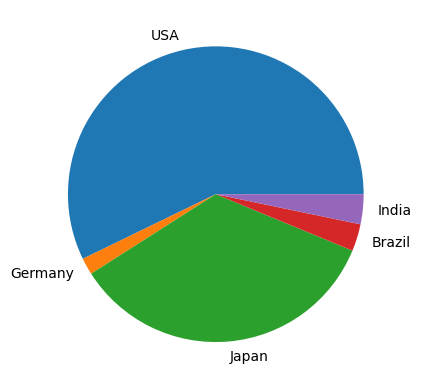

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(demand_markets.values(), labels=demand_markets.keys());

<div class="alert alert-block alert-info">
Exercise : Draw the manufacturing sites capacity on bar chart and compare it to the markets' demand

<div class="alert alert-block alert-info">
Exercise : Draw the fixed costs manufacturing sites on bar chart

<div class="alert alert-block alert-info">
Exercise : Draw the variable production costs for each country on bar chart

# 5. Optimization -- Build the model

In [9]:
#install the solver package
#!pip install gurobipy

# Import gurobi modeler functions
from gurobipy import *

In [10]:
# yik = 1 if 

<div class="alert alert-block alert-info">
Exercise : Create a 'model' variable and define your decision variables

In [11]:
locationM = Model("location")
plants = markets

locationVar = locationM.addVars(markets, capacity_levels, vtype = GRB.BINARY, name="locationVar")

allocationVar=locationM.addVars(markets, markets, vtype = GRB.CONTINUOUS, name="allocationVar")

Restricted license - for non-production use only - expires 2025-11-24


<div class="alert alert-block alert-info">
Exercise : Define the capacity level selection constraint

In [12]:
locationM.addConstrs((quicksum(locationVar[plant_id, cap_id] for cap_id in capacity_levels)
                      <= 1 for plant_id in plants), name="CapChoice")

{'USA': <gurobi.Constr *Awaiting Model Update*>,
 'Germany': <gurobi.Constr *Awaiting Model Update*>,
 'Japan': <gurobi.Constr *Awaiting Model Update*>,
 'India': <gurobi.Constr *Awaiting Model Update*>,
 'Brazil': <gurobi.Constr *Awaiting Model Update*>}

<div class="alert alert-block alert-info">
Exercise : Define the capacity restriction capacity on production site

In [13]:
locationM.addConstrs((quicksum(allocationVar[plant_id, market_id] for market_id in markets)
                      <= quicksum(manufacturing_capacity[level_id]* locationVar[plant_id, level_id] for level_id in capacity_levels)
                      for plant_id in plants
                      ),name="CapLimit")

{'USA': <gurobi.Constr *Awaiting Model Update*>,
 'Germany': <gurobi.Constr *Awaiting Model Update*>,
 'Japan': <gurobi.Constr *Awaiting Model Update*>,
 'India': <gurobi.Constr *Awaiting Model Update*>,
 'Brazil': <gurobi.Constr *Awaiting Model Update*>}

<div class="alert alert-block alert-info">
Exercise : Define the covering demand constraint

In [14]:
locationM.addConstrs((quicksum(allocationVar[plant_id, market_id] for plant_id in plants)
                      ==demand_markets[market_id] for market_id in markets), name="DemCovering")

{'USA': <gurobi.Constr *Awaiting Model Update*>,
 'Germany': <gurobi.Constr *Awaiting Model Update*>,
 'Japan': <gurobi.Constr *Awaiting Model Update*>,
 'India': <gurobi.Constr *Awaiting Model Update*>,
 'Brazil': <gurobi.Constr *Awaiting Model Update*>}

<div class="alert alert-block alert-info">
Exercise : Define the problem objective function, consider expression from gurobi, save into lp and solve the model

In [15]:
total_fixed = quicksum(locationVar[plant_id, cap_id]
                       *prod_fixed_costs[plant_id][cap_id] for plant_id in plants for cap_id in capacity_levels)

total_variable_costs = quicksum(prod_variable_costs[plant_id]* allocationVar[plant_id, market_id]
                                for plant_id in plants for market_id in markets)

total_shipping_cost = quicksum((1/10000)*shipping_variable_costs[plants.index(plant_id)][markets.index(market_id)]
                               *allocationVar[plant_id, market_id]
                               for plant_id in plants for market_id in markets)

total_cost = total_fixed + total_variable_costs + total_shipping_cost


locationM.setObjective(total_cost, GRB.MINIMIZE)

In [16]:
locationM.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.3.0 23D60)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 15 rows, 35 columns and 70 nonzeros
Model fingerprint: 0x57b0c297
Variable types: 25 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+06]
  Objective range  [5e+00, 1e+07]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+06]
Presolve time: 0.00s
Presolved: 15 rows, 35 columns, 70 nonzeros
Variable types: 25 continuous, 10 integer (10 binary)
Found heuristic solution: objective 6.325338e+07

Root relaxation: objective 5.908318e+07, 25 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 5.9083e+07    0    1 6.3253e+07 5.9083e+07  6.59%     -    0s
H    0     0                    6

<div class="alert alert-block alert-info">
Exercise : Print out the results

In [17]:
locationM.ObjVal

62148747.5

In [18]:
total_shipping_cost.getValue()

623747.5

<div class="alert alert-block alert-info">
Exercise : Analyze the results, comment and, check the capacity utilization

In [19]:
for plant_id in plants:
    for cap_id in capacity_levels:
        if locationVar[plant_id, cap_id].X !=0:
            print('plant ', plant_id, 'with cap level: ', cap_id, ' ', locationVar[plant_id, cap_id].X)

plant  Germany with cap level:  low   1.0
plant  Japan with cap level:  high   1.0
plant  India with cap level:  high   1.0
plant  Brazil with cap level:  high   1.0


In [20]:
for plant_id in plants:
    for market_id in markets:
        if locationVar[plant_id, market_id].X !=0:
            print("plant ", plant_id, 'market ', market_id, ' ', allocationVar[plant_id, market_id].X)

KeyError: ('USA', 'USA')

 <div class="alert alert-block alert-info">
Exercise : what is the limit of the solution: what if the demand increases +10% in x , +20% in x 

<div class="alert alert-block alert-info">
Exercise : Scenario 2: Redo the network optimization by considering the production of India by 2

<div class="alert alert-block alert-info">
Exercise : Scenario 3: Redo the network optimization by explosing the shipping costs

# 6. Monte Carlo Simulation 

We cannot rely on a single solution and expect that our network will absorb the demand throughout the year.

Usually, these parameters are calculated based on the yearly average of the sales.

Let’s simulate this demand variability and see the impact on the network design.


## Generate 50 scenarios

We will assume that the demand is following a normal distribution with a coefficient of variation CV = 0.5. (You can adapt the distribution to your needs)


<div class="alert alert-block alert-info">
Exercise : Generate 10 scenarios of customers' demand, solve each of the scenarios, and save the obtained solution for each scenario

<div class="alert alert-block alert-info">
Exercise : Solve the optimization model for each demand scenario, Compare the solution obtained from each scenario and take a decision

# 7. Visualization 

In [ ]:
!pip install folium

import folium
# define the world map
world_map = folium.Map(tiles='cartodb positron')

# display world map
world_map

In [ ]:
# San Francisco latitude and longitude values
#latitude = 37.77
#longitude = -122.42

# create map and display it
#sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
#sanfran_map

In [ ]:
# import pandas library
import pandas as pd

# Make a data frame with dots to show on the map 
data = pd.DataFrame({
    'lat':[36.966428,-14.242915,51.095123, 21.7679,34.886306],
    'lon':[-95.844032, -53.189266, 10.271483, 78.8718, 134.379711],
    'name':['USA', 'Brazil', 'Germany', 'India', 'Japan']},
 dtype=str)

data
# create map and display it
#sanfran_map = folium.Map(location=USA, zoom_start=2)

# display the map of San Francisco
#sanfran_map

In [ ]:
# add marker one by one on the map
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
   ).add_to(world_map)

# Show the map again
world_map


In [ ]:
#save map as standalone html file if needed
world_map.save('../../static/interactiveCharts/312-add-markers-on-folium-map.html')